In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import zscore
warnings.filterwarnings( "ignore")
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost 
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
!pip install xgboost 

In [3]:
elec_df = pd.read_excel("Election_Data.xlsx",sheet_name ="Election_Dataset_Two Classes")
elec_df.head(11)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
elec_df = elec_df.drop("Unnamed: 0",axis = 1)

In [5]:
elec_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
elec_df.shape

(1525, 9)

In [7]:
print("no. of rows: ",elec_df.shape[0], "\n""no. of columns: ",elec_df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [8]:
elec_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
elec_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
elec_df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [12]:
dups = elec_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

elec_df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [13]:
print('Before',elec_df.shape)
elec_df.drop_duplicates(inplace=True) 
print('After',elec_df.shape)

Before (1525, 9)
After (1517, 9)


In [14]:
for column in elec_df.columns:
    if elec_df[column].dtype == 'object':
        print(column.upper(),': ',elec_df[column].nunique())
        print(elec_df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




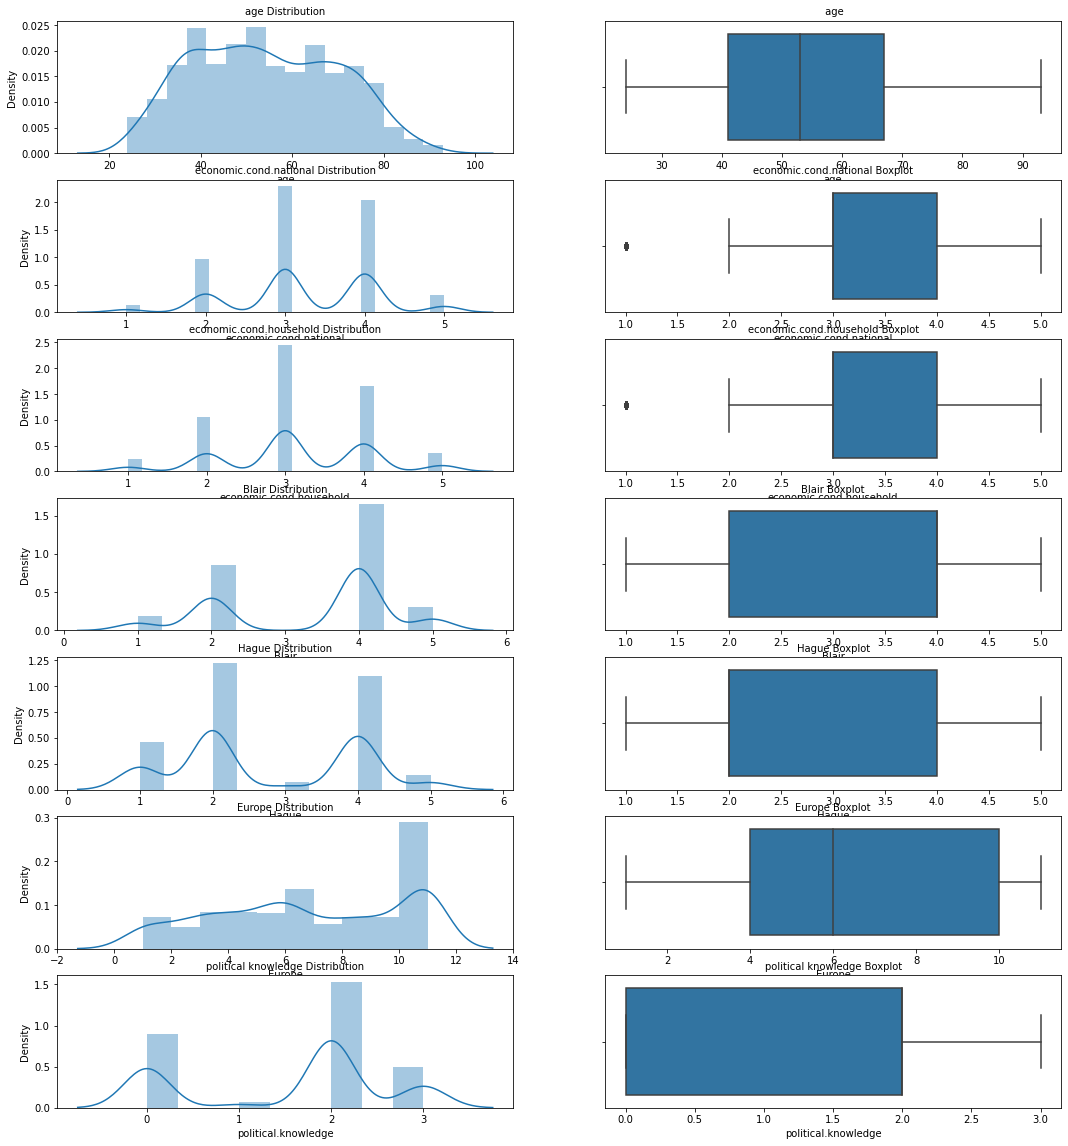

In [15]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(18,20)

a = sns.distplot(elec_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(elec_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(elec_df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)
a = sns.boxplot(elec_df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(elec_df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)
a = sns.boxplot(elec_df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(elec_df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)
a = sns.boxplot(elec_df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(elec_df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)
a = sns.boxplot(elec_df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(elec_df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)
a = sns.boxplot(elec_df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(elec_df['political.knowledge'] , ax=axes[6][0])
a.set_title("political knowledge Distribution",fontsize=10)
a = sns.boxplot(elec_df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political knowledge Boxplot",fontsize=10)

plt.show()

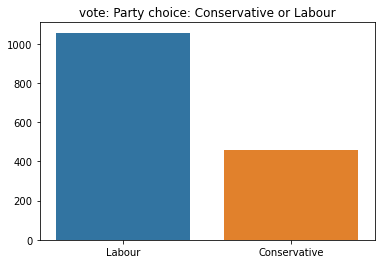

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


In [16]:
sns.barplot(elec_df.vote.value_counts().index,elec_df.vote.value_counts().values)
plt.title("vote: Party choice: Conservative or Labour")
plt.show()
print(elec_df.vote.value_counts(normalize=True))

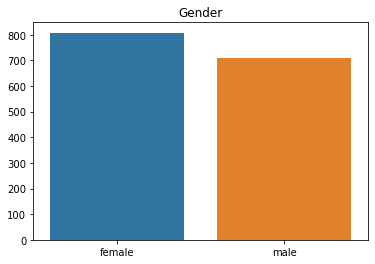

female    0.53263
male      0.46737
Name: gender, dtype: float64


In [17]:
sns.barplot(elec_df.gender.value_counts().index,elec_df.gender.value_counts().values)
plt.title("Gender")
plt.show()
print(elec_df.gender.value_counts(normalize=True))

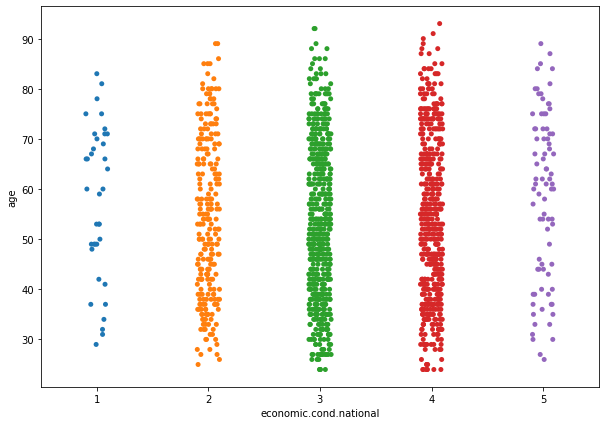

In [18]:
plt.figure(figsize=(10,7))
sns.stripplot(elec_df["economic.cond.national"], elec_df["age"], jitter=True) 
plt.show()

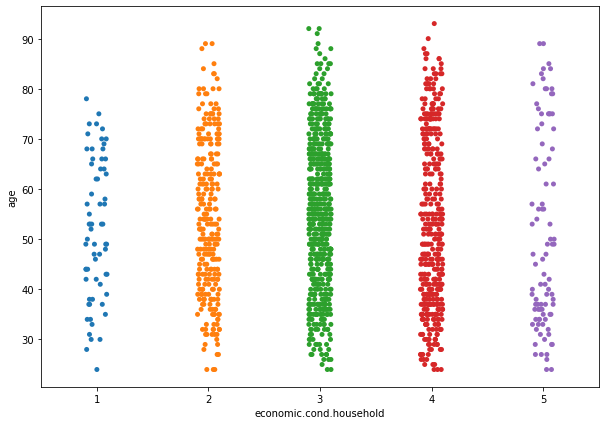

In [19]:
plt.figure(figsize=(10,7))
sns.stripplot(elec_df["economic.cond.household"], elec_df["age"], jitter=True) 
plt.show()

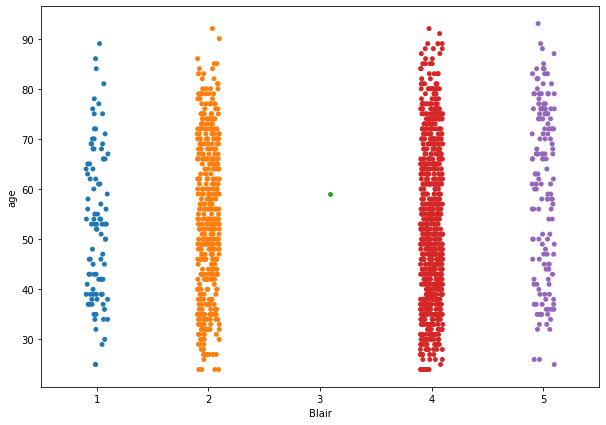

In [20]:
plt.figure(figsize=(10,7))
sns.stripplot(elec_df["Blair"], elec_df["age"], jitter=True) 
plt.show()

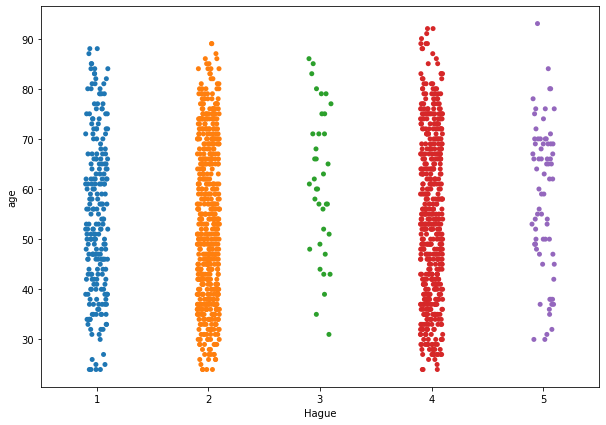

In [21]:
plt.figure(figsize=(10,7))
sns.stripplot(elec_df["Hague"], elec_df["age"], jitter=True) 
plt.show()

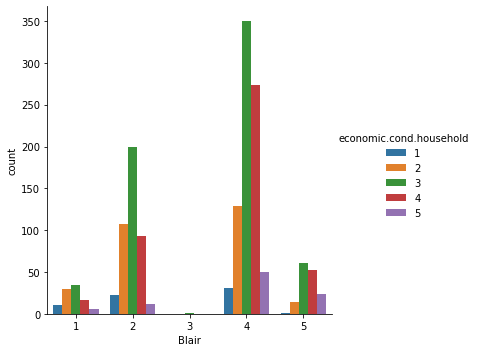

In [22]:
sns.catplot(x="Blair", kind="count",hue='economic.cond.household',data=elec_df)

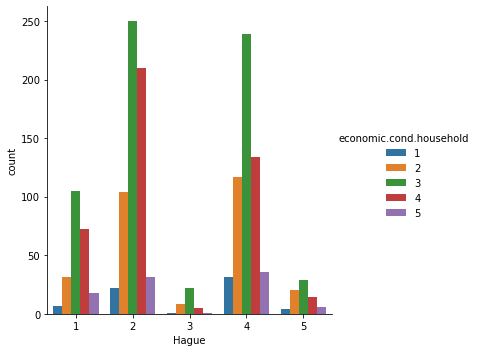

In [23]:
sns.catplot(x="Hague", kind="count",hue='economic.cond.household',data=elec_df)

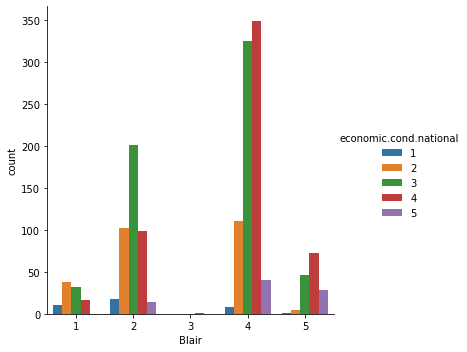

In [24]:
sns.catplot(x="Blair", kind="count",hue='economic.cond.national',data=elec_df)

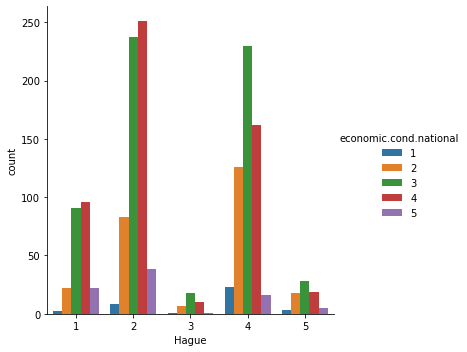

In [25]:
sns.catplot(x="Hague", kind="count",hue='economic.cond.national',data=elec_df)

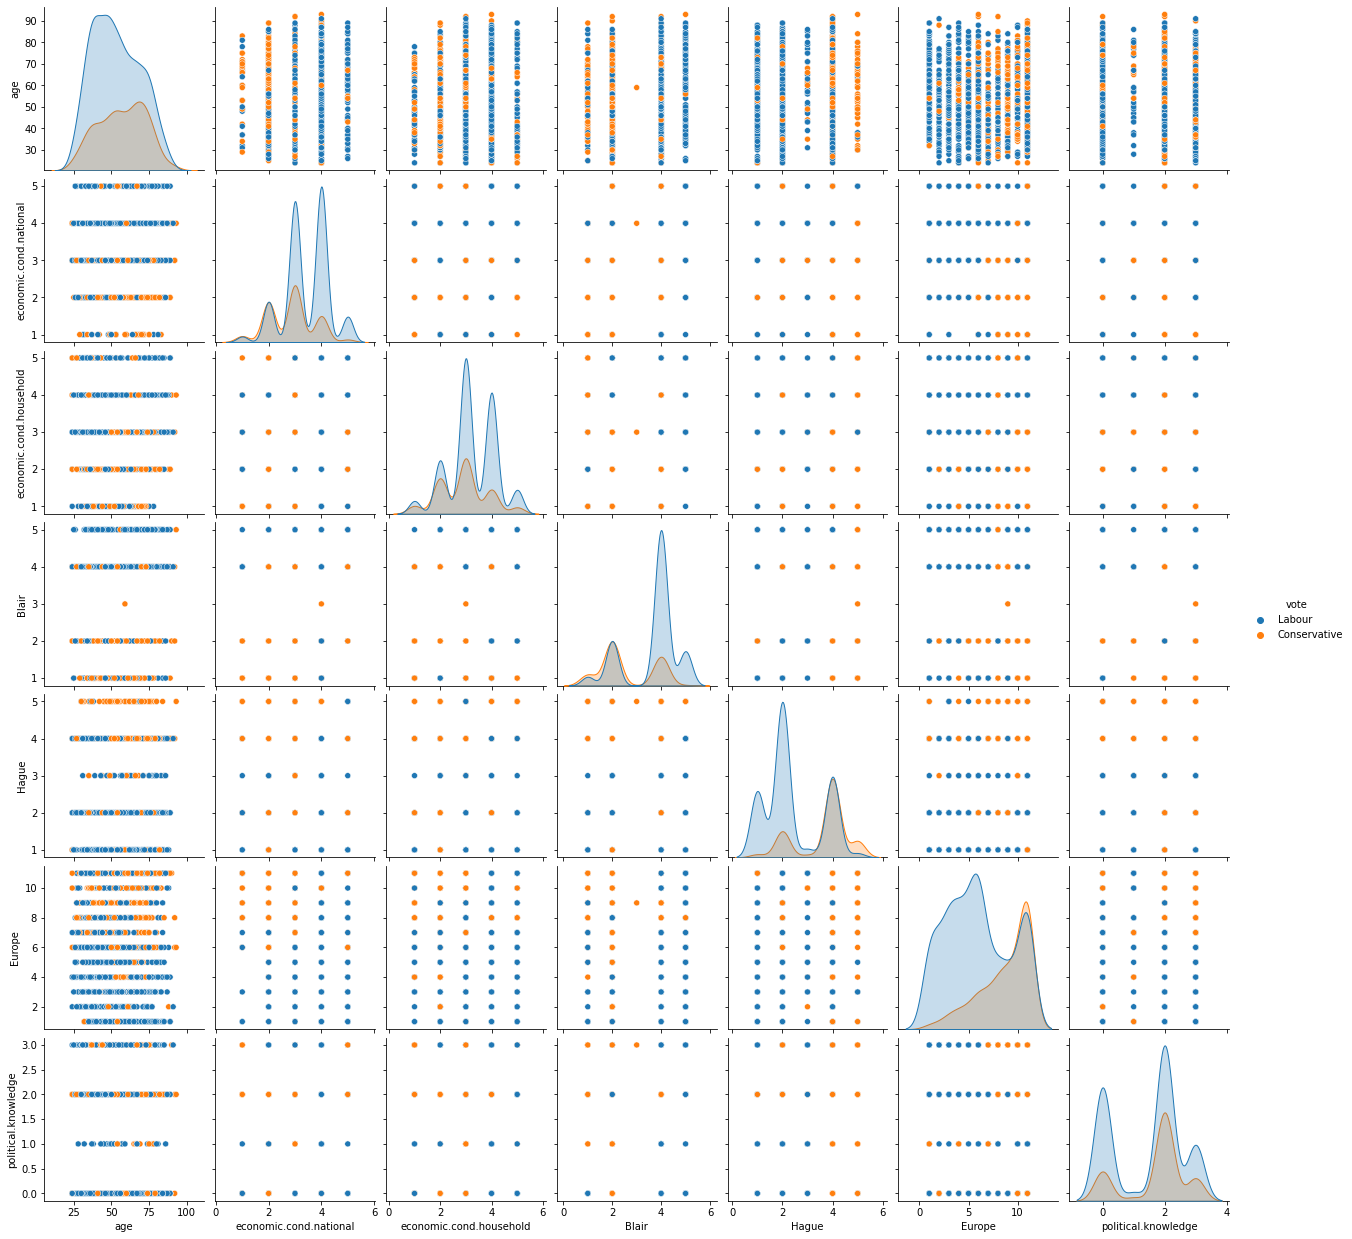

In [26]:
sns.pairplot(elec_df,hue="vote")

In [27]:
corr = elec_df.corr(method='pearson')

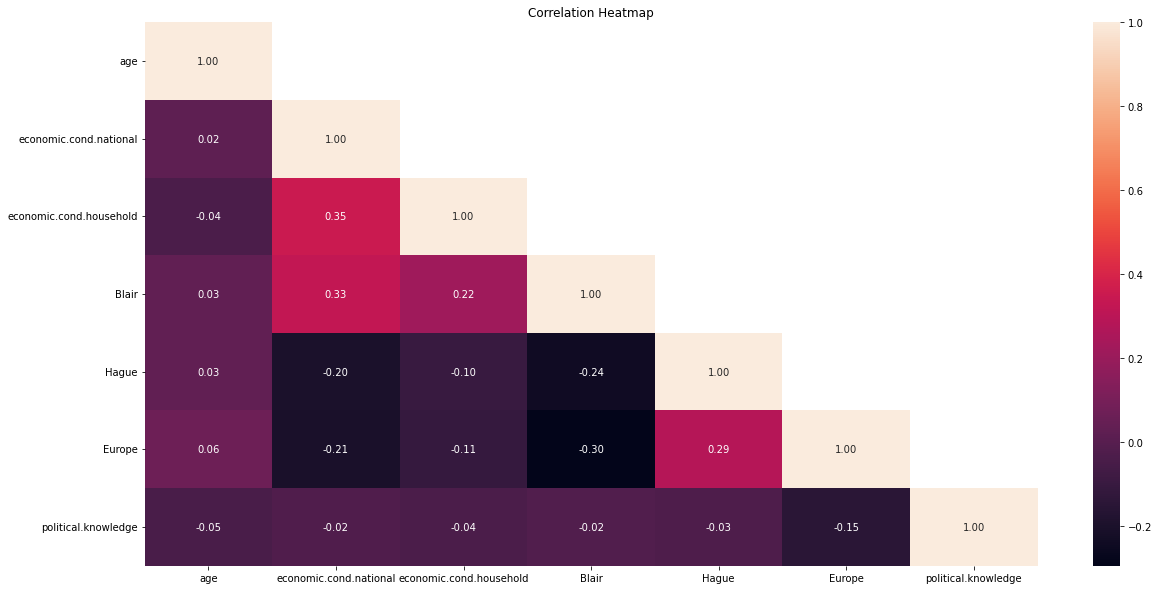

In [28]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(elec_df.corr(), annot=True,fmt='.2f',mask=np.triu(elec_df.corr(),+1));
plt.title('Correlation Heatmap')
plt.show()

In [29]:
elec_df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


Text(0.5, 1.0, 'vote vs economic.cond.national')

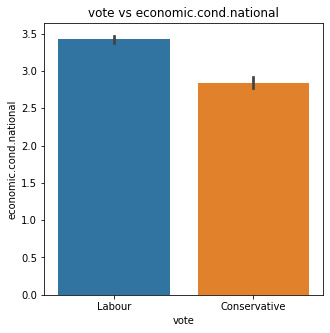

In [30]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='vote', y='economic.cond.national',data=elec_df)
plt.title("vote vs economic.cond.national")

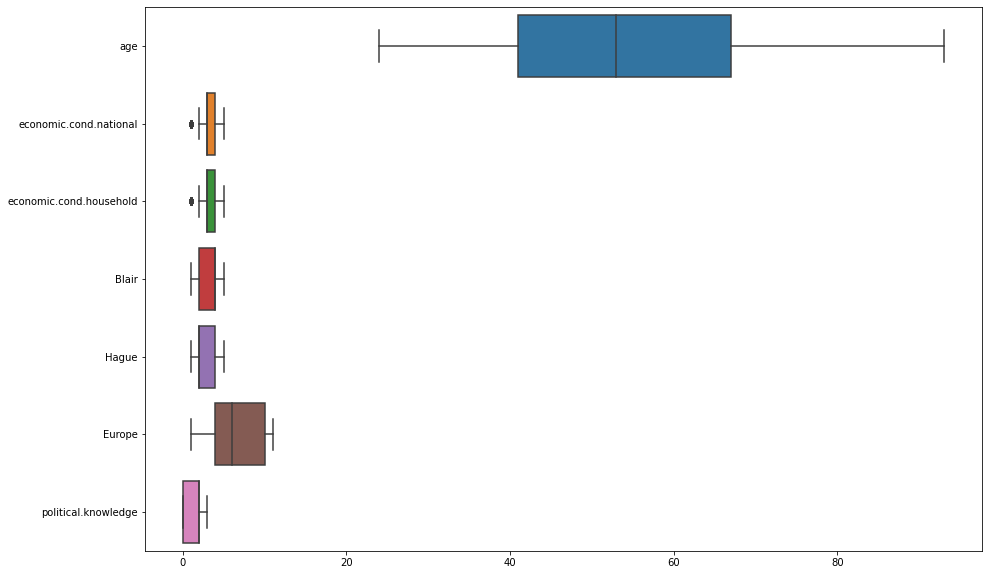

In [31]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=elec_df,orient="h")
plt.show()

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
dtypes=elec_df.dtypes[(elec_df.dtypes!= 'object')].index
for column in elec_df[dtypes].columns:
    lr,ur=remove_outlier(elec_df[column])
    elec_df[column]=np.where(elec_df[column]>ur,ur,elec_df[column])
    elec_df[column]=np.where(elec_df[column]<lr,lr,elec_df[column])

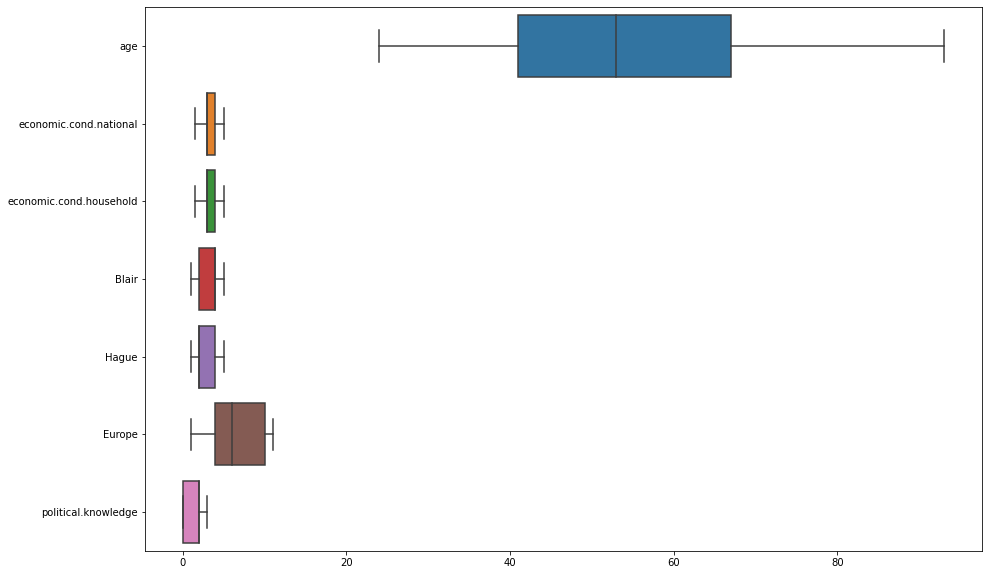

In [34]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=elec_df,orient="h")
plt.show()

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [35]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   object 
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   object 
dtypes: float64(7), object(2)
memory usage: 150.8+ KB


In [36]:
elec_df['age'] = elec_df['age'].astype('int64')
elec_df['economic.cond.national'] = elec_df['economic.cond.national'].astype('int64')
elec_df['economic.cond.household'] = elec_df['economic.cond.household'].astype('int64')
elec_df['Blair'] = elec_df['Blair'].astype('int64')
elec_df['Hague'] = elec_df['Hague'].astype('int64')
elec_df['Europe'] = elec_df['Europe'].astype('int64')
elec_df['political.knowledge'] = elec_df['political.knowledge'].astype('int64')

In [37]:
elec_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [38]:
for feature in elec_df.columns: 
    if elec_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(elec_df[feature].unique()))
        print(pd.Categorical(elec_df[feature].unique()).codes)
        elec_df[feature] = pd.Categorical(elec_df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [39]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [40]:
elec_df['vote'] = elec_df['vote'].astype('int64')
elec_df['gender'] = elec_df['gender'].astype('int64')

elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


# Train-Test Split

In [41]:
X = elec_df.drop('vote', axis=1)
y = elec_df[['vote']]

In [42]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]].apply(zscore)

In [43]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [45]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(elec_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(elec_df.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [46]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (1061, 8)
The training set for the dependent variable: (1061, 1)
The test set for the independent variables: (456, 8)
The test set for the dependent variable: (456, 1)


# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

# Logistic Regression Model

In [47]:
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [48]:
ytrain_predict = LR_model.predict(X_train)
ytest_predict = LR_model.predict(X_test)

In [49]:
ytest_predict_prob=LR_model.predict_proba(X_train)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.931825,0.068175
1,0.096984,0.903016
2,0.298416,0.701584
3,0.110210,0.889790
4,0.017223,0.982777


In [50]:
ytest_predict_prob=LR_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593


In [51]:
LR_model.score(X_train, y_train)

0.8312912346842601

AUC: 0.890


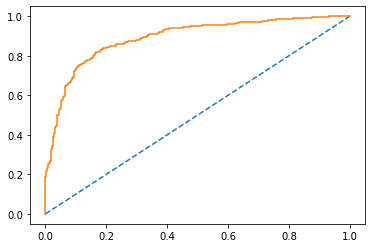

In [52]:
probs = LR_model.predict_proba(X_train)
probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

In [53]:
LR_model.score(X_test, y_test)

0.8355263157894737

AUC: 0.890


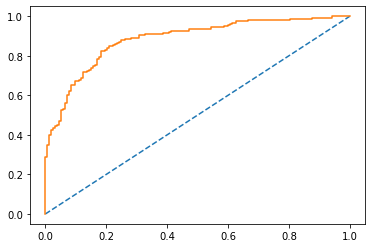

In [54]:
probs = LR_model.predict_proba(X_test)

probs = probs[:, 1]

test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [55]:
confusion_matrix(y_train, ytrain_predict)

array([[196, 111],
       [ 68, 686]], dtype=int64)

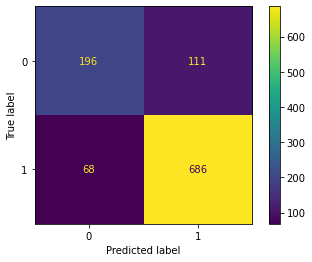

In [56]:
plot_confusion_matrix(LR_model,X_train,y_train);

In [57]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [58]:
confusion_matrix(y_test, ytest_predict)

array([[113,  40],
       [ 35, 268]], dtype=int64)

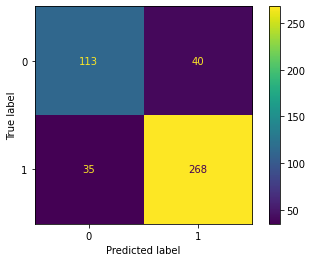

In [59]:
plot_confusion_matrix(LR_model,X_test,y_test);

In [60]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [61]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [62]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [63]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [65]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [66]:
best_model = grid_search.best_estimator_

In [67]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [68]:
ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.929485,0.070515
1,0.098812,0.901188
2,0.298375,0.701625
3,0.112186,0.887814
4,0.017938,0.982062


In [69]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423335,0.576665
1,0.150399,0.849601
2,0.007491,0.992509
3,0.832830,0.167170
4,0.069933,0.930067


              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



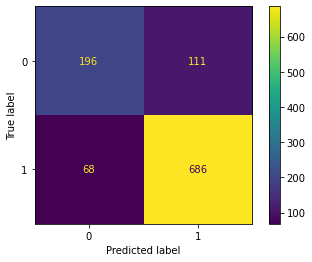

In [70]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



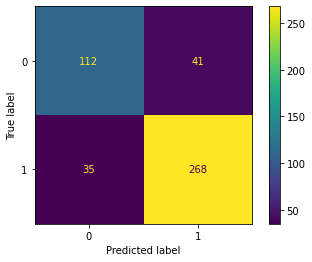

In [71]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# LDA (Linear Discriminant Analysis)

In [72]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [73]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [74]:
ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.929485,0.070515
1,0.098812,0.901188
2,0.298375,0.701625
3,0.112186,0.887814
4,0.017938,0.982062


In [75]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423335,0.576665
1,0.150399,0.849601
2,0.007491,0.992509
3,0.832830,0.167170
4,0.069933,0.930067


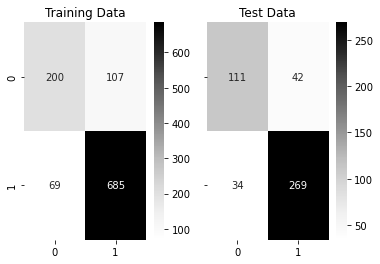

In [76]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [77]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [78]:
pred_prob_train = model.predict_proba(X_train)

pred_prob_test = model.predict_proba(X_test)

In [79]:
pred_prob_train[:,1]

array([0.05078353, 0.92175938, 0.69261127, ..., 0.77911156, 0.79161073,
       0.98113175])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


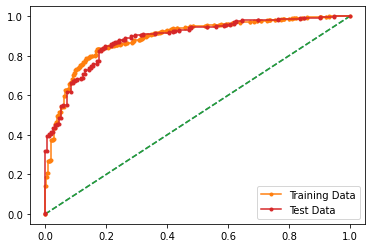

In [80]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label = 'Training Data')



auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# KNN Model

In [81]:
X = elec_df.drop('vote', axis=1)
y = elec_df[['vote']]

In [82]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]].apply(zscore)

In [83]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors = 15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [86]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [87]:
ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.929485,0.070515
1,0.098812,0.901188
2,0.298375,0.701625
3,0.112186,0.887814
4,0.017938,0.982062


In [88]:
ytrain_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.423335,0.576665
1,0.150399,0.849601
2,0.007491,0.992509
3,0.832830,0.167170
4,0.069933,0.930067


In [89]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8388312912346843
[[203 104]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [90]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[106  47]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [91]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.20833333333333337,
 0.1864035087719298,
 0.16885964912280704,
 0.16447368421052633,
 0.17763157894736847,
 0.1842105263157895,
 0.1885964912280702,
 0.17763157894736847,
 0.17763157894736847,
 0.17982456140350878]

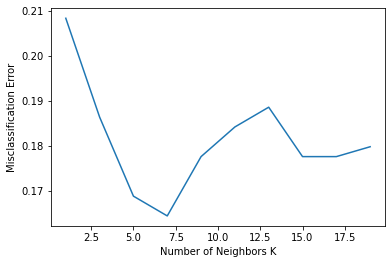

In [92]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

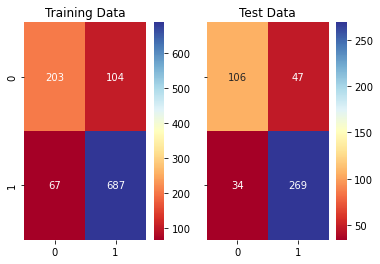

In [93]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [94]:
print(classification_report(y_train,y_train_predict),'\n');
print(classification_report(y_test,y_test_predict),'\n');

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061
 

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC: 0.904


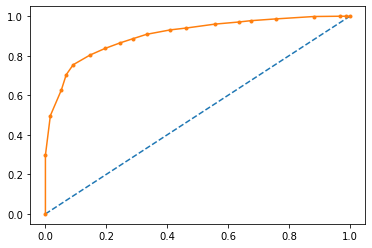

In [95]:
# AUC and ROC for the training data
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.891


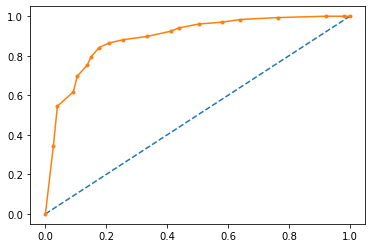

In [96]:
# AUC and ROC for the test data
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Gaussian Naive Bayes

In [97]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [98]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [99]:
ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.929485,0.070515
1,0.098812,0.901188
2,0.298375,0.701625
3,0.112186,0.887814
4,0.017938,0.982062


In [100]:
ytrain_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.423335,0.576665
1,0.150399,0.849601
2,0.007491,0.992509
3,0.832830,0.167170
4,0.069933,0.930067


In [101]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [102]:
y_test.value_counts()

vote
1       303
0       153
dtype: int64

In [103]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



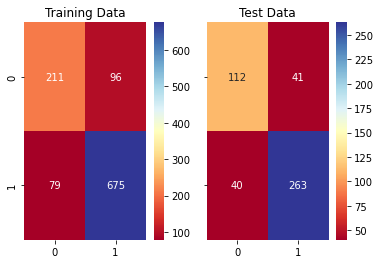

In [104]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.888


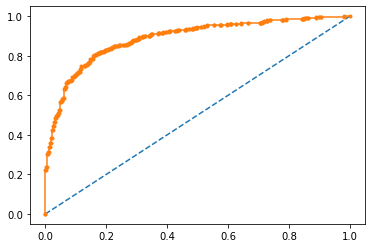

In [105]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.876


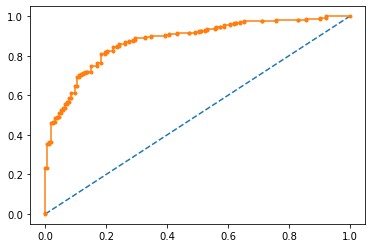

In [106]:
# AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [107]:
model_rf=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
model_bag=BaggingClassifier(base_estimator=model_rf,n_estimators=100,random_state=1)
model_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=100, random_state=1)

In [108]:
y_train_predict_bag = model_bag.predict(X_train)

In [109]:
y_test_predict_bag = model_bag.predict(X_test)

In [110]:
acc_bag_train =model_bag.score(X_train, y_train)
acc_bag_train

0.8369462770970783

In [111]:
acc_bag_test =model_bag.score(X_test, y_test)
acc_bag_test

0.8223684210526315

In [112]:
ytrain_predict_prob_bag=model_bag.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_bag).head()

,0,1
0,0.766279,0.233721
1,0.180859,0.819141
2,0.372103,0.627897
3,0.117694,0.882306
4,0.060869,0.939131


In [113]:
ytest_predict_prob_bag=model_bag.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_bag).head()

,0,1
0,0.443365,0.556635
1,0.197645,0.802355
2,0.023219,0.976781
3,0.710856,0.289144
4,0.320475,0.679525


# AdaBoost Classifier

In [114]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [115]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [116]:
ABC_model = AdaBoostClassifier(random_state=1)
ABC_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [117]:
abc_score=get_metrics_score(ABC_model)

Accuracy on training set :  0.8463713477851084
Accuracy on test set :  0.8135964912280702
Recall on training set :  0.9124668435013262
Recall on test set :  0.8778877887788779
Precision on training set :  0.8764331210191083
Precision on test set :  0.8471337579617835


In [118]:
y_train_predict = ABC_model.predict(X_train)
model_score = ABC_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8463713477851084
[[210  97]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [119]:
y_test_predict = ABC_model.predict(X_test)
model_score = ABC_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[105  48]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



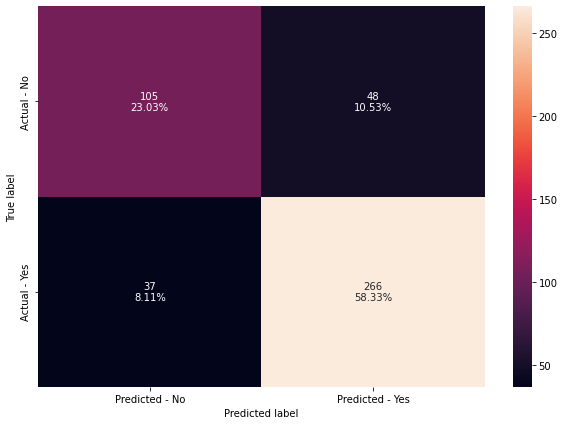

In [120]:
make_confusion_matrix(ABC_model,y_test)

# Tuning

In [121]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [122]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7945334590009425
Accuracy on test set :  0.7785087719298246
Recall on training set :  0.9575596816976127
Recall on test set :  0.9636963696369637
Precision on training set :  0.7951541850220264
Precision on test set :  0.7643979057591623


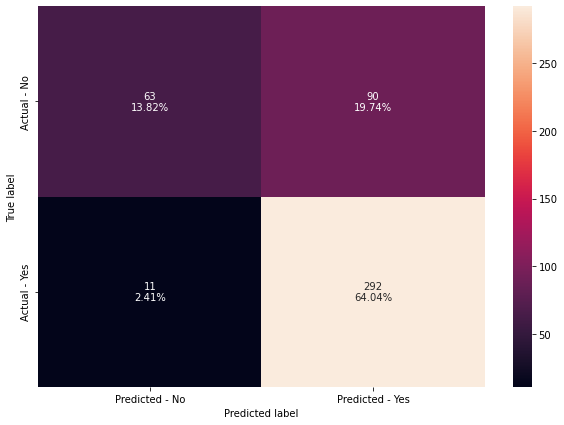

In [123]:
make_confusion_matrix(abc_tuned,y_test)

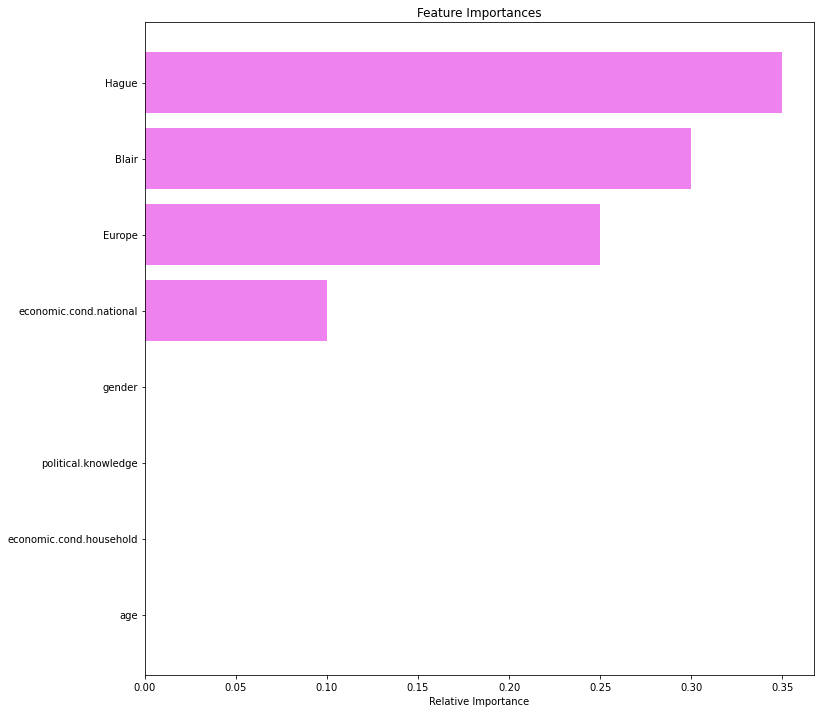

In [124]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AUC: 0.912


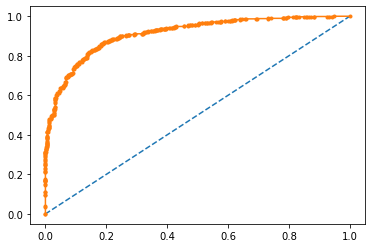

In [125]:
# AUC and ROC for the training data

# predict probabilities
probs = ABC_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.881


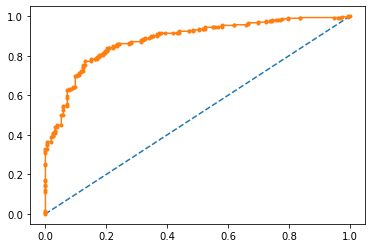

In [126]:
# AUC and ROC for the testing data
# predict probabilities
probs = ABC_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Gradient Boosting Classifier

In [127]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [128]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8355263157894737
Recall on training set :  0.9389920424403183
Recall on test set :  0.9108910891089109
Precision on training set :  0.9123711340206185
Precision on test set :  0.8518518518518519


In [129]:
y_train_predict = gbc.predict(X_train)
model_score = gbc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [130]:
y_test_predict = gbc.predict(X_test)
model_score = gbc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



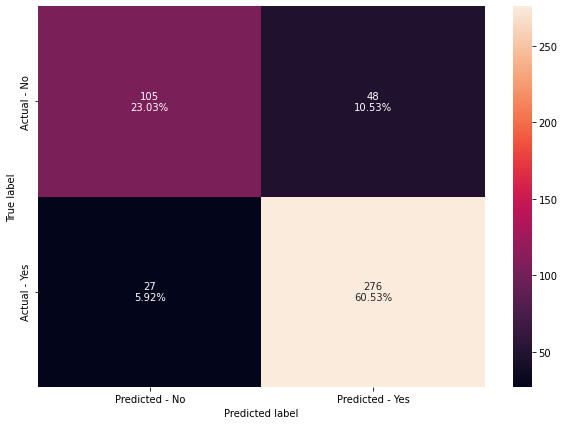

In [131]:
make_confusion_matrix(gbc,y_test)

# Tuning

In [132]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [133]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8377192982456141
Recall on training set :  0.9416445623342176
Recall on test set :  0.9141914191419142
Precision on training set :  0.9102564102564102
Precision on test set :  0.8523076923076923


In [134]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [135]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8737040527803959
Accuracy on test set :  0.8333333333333334
Recall on training set :  0.9350132625994695
Recall on test set :  0.9075907590759076
Precision on training set :  0.8924050632911392
Precision on test set :  0.8513931888544891


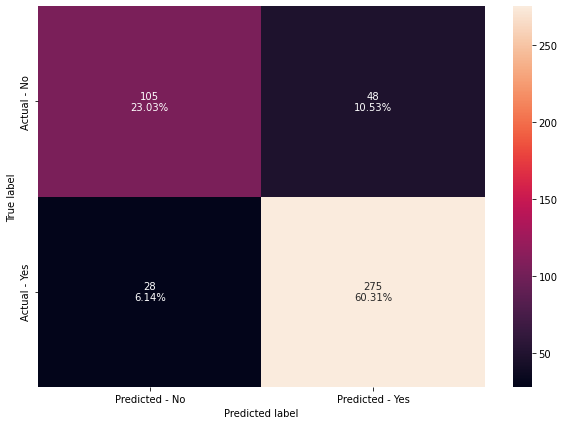

In [136]:
make_confusion_matrix(gbc_tuned,y_test)

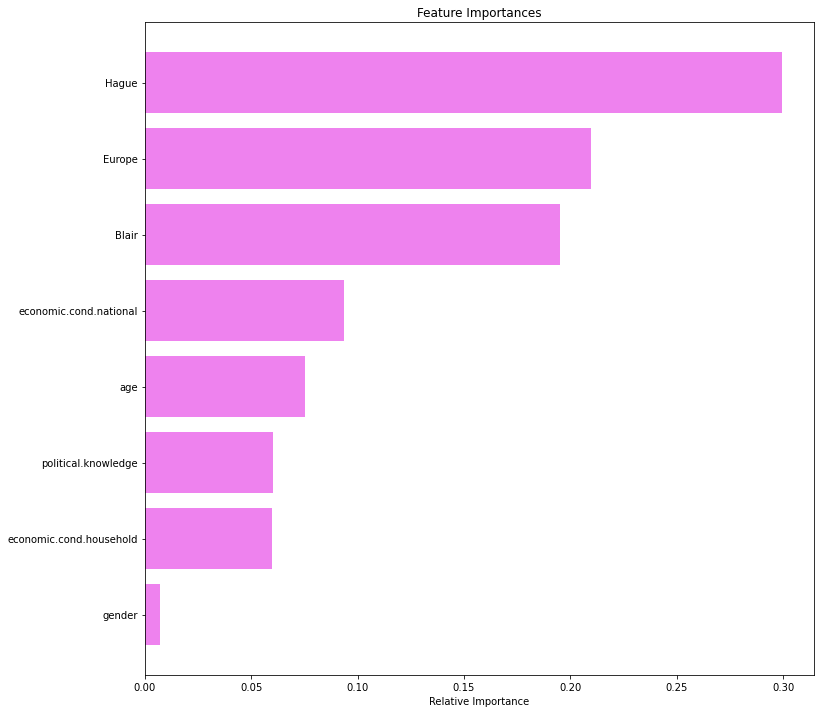

In [137]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AUC: 0.951


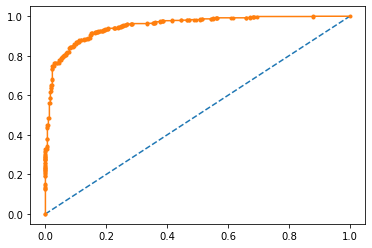

In [138]:
# AUC and ROC for the training data

# predict probabilities
probs = gbc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.899


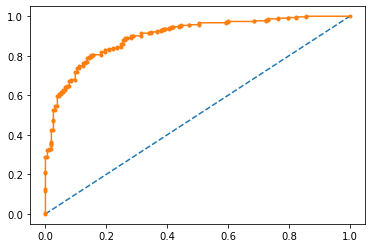

In [139]:
# AUC and ROC for the testing data


# predict probabilities
probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [141]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [142]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 1.000


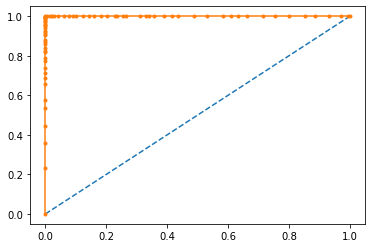

In [143]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.896


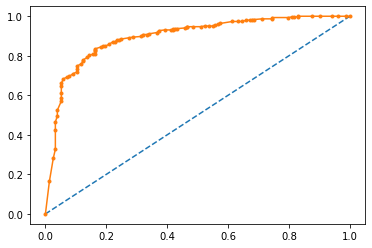

In [144]:
# AUC and ROC for the testing data


# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Decision Tree

In [145]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [146]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [147]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7785087719298246
[[ 98  55]
 [ 46 257]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       153
           1       0.82      0.85      0.84       303

    accuracy                           0.78       456
   macro avg       0.75      0.74      0.75       456
weighted avg       0.78      0.78      0.78       456



AUC: 1.000


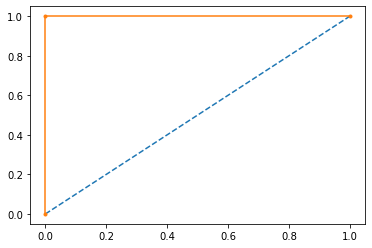

In [148]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.744


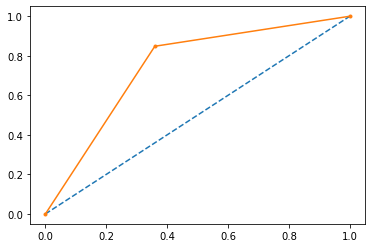

In [149]:
# AUC and ROC for the testing data


# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# PROBLEM 2

In [150]:
import pandas as pd
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
import matplotlib.pyplot as plt
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
import json
import re
import string
import pandas as pd

[nltk_data] Downloading package inaugural to C:\Users\Sharmistha
[nltk_data]     Nandy\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sharmistha
[nltk_data]     Nandy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [152]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [153]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


# 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [154]:
Roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
Kennedy_raw = inaugural.raw('1961-Kennedy.txt')
Nixon_raw =inaugural.raw('1973-Nixon.txt')

In [155]:
print("The number of characters in Roosevelt speech are:",len(Roosevelt_raw))
print("The number of characters in Kennedy speech are:",len(Kennedy_raw))
print("The number of characters in Nixon speech are:",len(Nixon_raw))

The number of characters in Roosevelt speech are: 7571
The number of characters in Kennedy speech are: 7618
The number of characters in Nixon speech are: 9991


In [156]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
Kennedy_words = inaugural.words('1961-Kennedy.txt')
Nixon_words =inaugural.words('1973-Nixon.txt')

In [157]:
print("The number of Words in Roosevelt speech are:",len(inaugural.words('1941-Roosevelt.txt')))
print("The number of Words in Kennedy speech are:",len(inaugural.words('1961-Kennedy.txt')))
print("The number of Words in Nixon speech are:",len(inaugural.words('1973-Nixon.txt')))

The number of Words in Roosevelt speech are: 1536
The number of Words in Kennedy speech are: 1546
The number of Words in Nixon speech are: 2028


In [158]:
print("Most common words in Roosevelt speech:",nltk.FreqDist(Roosevelt_words).most_common(10))
print("Most common words in Kennedy speech:",nltk.FreqDist(Kennedy_words).most_common(10))
print("Most common words in Nixon speech:",nltk.FreqDist(Nixon_words).most_common(10))

Most common words in Roosevelt speech: [('the', 104), ('of', 81), (',', 77), ('.', 67), ('and', 44), ('to', 35), ('in', 30), ('a', 29), ('--', 25), ('is', 24)]
Most common words in Kennedy speech: [(',', 85), ('the', 83), ('of', 65), ('.', 51), ('to', 38), ('and', 37), ('a', 29), ('we', 27), ('--', 25), ('in', 24)]
Most common words in Nixon speech: [(',', 96), ('the', 80), ('.', 68), ('of', 68), ('to', 65), ('in', 54), ('and', 47), ('we', 38), ('a', 34), ('that', 32)]


In [159]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sharmistha
[nltk_data]     Nandy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
print("The number of sentences in Roosevelt speech are:",len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of sentences in Kennedy speech are:",len(inaugural.sents('1961-Kennedy.txt')))
print("The number of sentences in Nixon speech are:",len(inaugural.sents('1973-Nixon.txt')))

The number of sentences in Roosevelt speech are: 68
The number of sentences in Kennedy speech are: 52
The number of sentences in Nixon speech are: 69


# 2.2 Remove all the stopwords from all three speeches

Roosevelt speech

In [161]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 
all_words = (x.lower() for x in inaugural.words('1941-Roosevelt.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

Roosevelt_words_freq = nltk.FreqDist(all_words_clean)

word_features1 = [item[0] for item in Roosevelt_words_freq.most_common(50)]

In [162]:
print("Most common words in Roosevelt speech after removing stopwords")
print(word_features1)

Most common words in Roosevelt speech after removing stopwords
['nation', 'know', 'spirit', 'life', 'democracy', 'us', 'people', 'america', 'years', 'freedom', 'human', 'men', 'new', 'body', 'mind', 'speaks', 'day', 'states', 'government', 'must', 'something', 'faith', 'united', 'task', 'within', 'history', 'nations', 'three', 'live', 'future', 'free', 'alone', 'still', 'every', 'continent', 'like', 'person', 'world', 'sacred', 'came', 'first', 'destiny', 'national', '1789', 'sense', 'washington', 'create', 'together', 'disruption', 'without']


Kennedy speech

In [163]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

Kennedy_words_freq = nltk.FreqDist(all_words_clean)

word_features1 = [item[0] for item in Kennedy_words_freq.most_common(50)]

In [164]:
print("Most common words in Kennedy speech after removing stopwords")
print(word_features1)

Most common words in Kennedy speech after removing stopwords
['let', 'us', 'world', 'sides', 'new', 'pledge', 'citizens', 'power', 'shall', 'free', 'nations', 'ask', 'president', 'fellow', 'freedom', 'man', 'first', 'americans', 'war', 'peace', 'always', 'cannot', 'hope', 'help', 'arms', 'country', 'call', 'today', 'well', 'god', 'human', 'poverty', 'life', 'globe', 'dare', 'go', 'generation', 'know', 'bear', 'control', 'may', 'good', 'join', 'begin', 'never', 'final', 'vice', 'mr', 'forebears', 'century']


Nixon speech

In [165]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

Nixon_words_freq = nltk.FreqDist(all_words_clean)

word_features1 = [item[0] for item in Nixon_words_freq.most_common(50)]

In [166]:
print("Most common words in Nixon speech after removing stopwords")
print(word_features1)

Most common words in Nixon speech after removing stopwords
['us', 'let', 'america', 'peace', 'world', 'new', 'nation', 'responsibility', 'government', 'great', 'home', 'abroad', 'together', 'years', 'shall', 'policies', 'role', 'make', 'every', 'history', 'better', 'time', 'right', 'people', 'help', 'four', 'today', 'era', 'responsibilities', 'progress', 'come', 'respect', 'others', 'act', 'one', 'promise', 'long', 'work', 'freedom', 'god', 'old', 'proud', 'faith', 'mr', 'country', 'share', 'war', 'resolve', 'retreat', 'greatly']


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [167]:
print("Top three words in Roosevelt's speech:",nltk.FreqDist(Roosevelt_words_freq).most_common(3))

Top three words in Roosevelt's speech: [('nation', 12), ('know', 10), ('spirit', 9)]


In [168]:
print("Top three words in Kennedy's speech:",nltk.FreqDist(Kennedy_words_freq).most_common(3))

Top three words in Kennedy's speech: [('let', 16), ('us', 12), ('world', 8)]


In [169]:
print("Top three words in Nixon's speech:",nltk.FreqDist(Nixon_words_freq).most_common(3))

Top three words in Nixon's speech: [('us', 26), ('let', 22), ('america', 21)]


# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

# Roosevelt's Speech

In [170]:
!pip install nltk

In [171]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sharmistha
[nltk_data]     Nandy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
Roosevelt_df = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
Kennedy_df =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
Nixon_df =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

In [173]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
stop_words.extend(["--"])

In [174]:
corpus1 = Roosevelt_df['Roosevelt'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus1

0    On national day inauguration since 1789, peopl...
Name: Roosevelt, dtype: object

In [175]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["--"])

In [176]:
wc_a = ' '.join(corpus1)

Word Cloud of Roosevelt speech(after removing the stopwords)


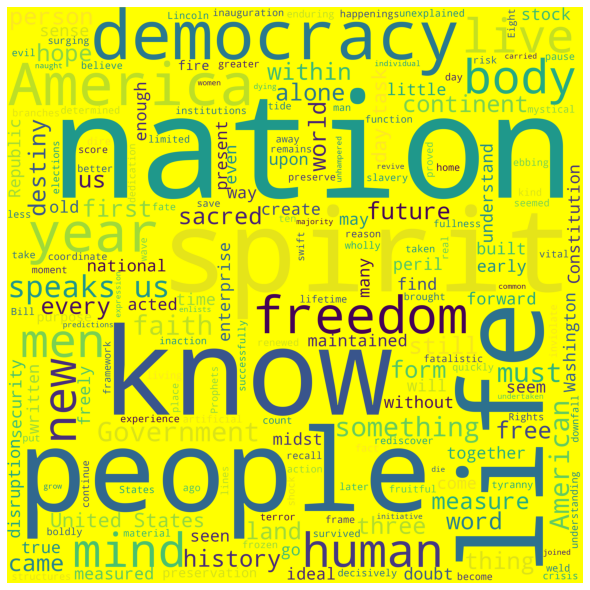

In [177]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='yellow', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of Roosevelt speech(after removing the stopwords)")
plt.show()

# Kennedy's speech

In [178]:
corpus2 = Kennedy_df['Kennedy'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus2

0    Vice President Johnson, Mr. Speaker, Mr. Chief...
Name: Kennedy, dtype: object

In [179]:
wc_a1 = ' '.join(corpus2)

Word Cloud  (after cleaning)!!


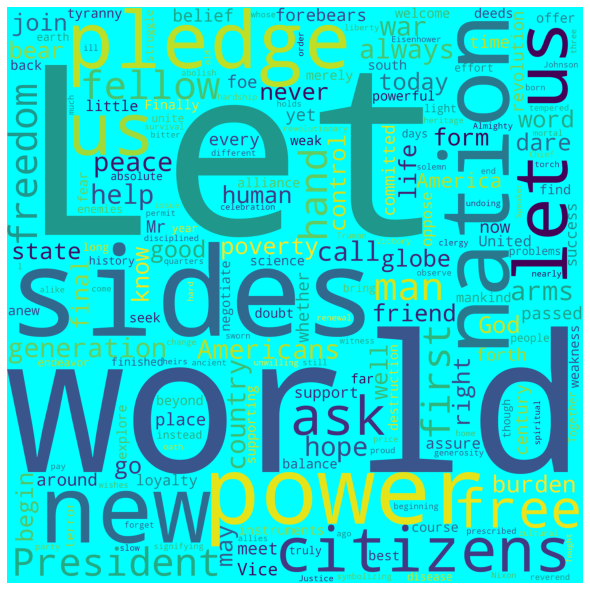

In [180]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='cyan', 
                min_font_size = 10, random_state=100).generate(wc_a1) 
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()

# Nixon's speech

In [181]:
corpus3 = Nixon_df['Nixon'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus3

0    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Nixon, dtype: object

In [182]:
wc_a2 = ' '.join(corpus3)

Word Cloud  (after cleaning)!!


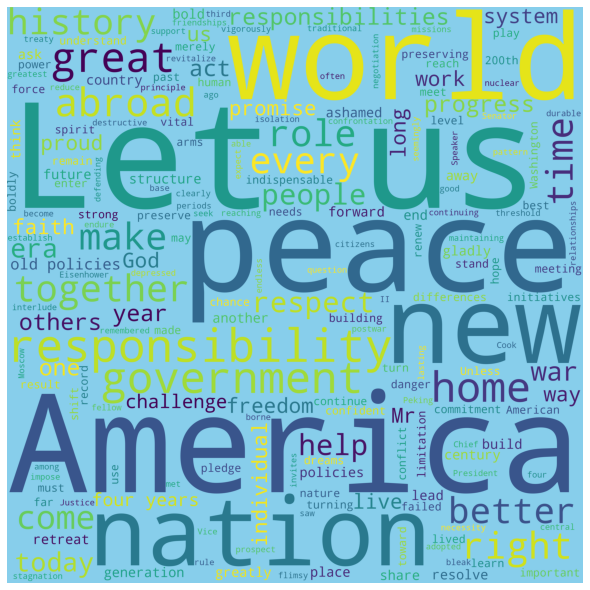

In [183]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='skyblue', 
                min_font_size = 10, random_state=100).generate(wc_a2) 
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()